# Cardiovascular Disease 

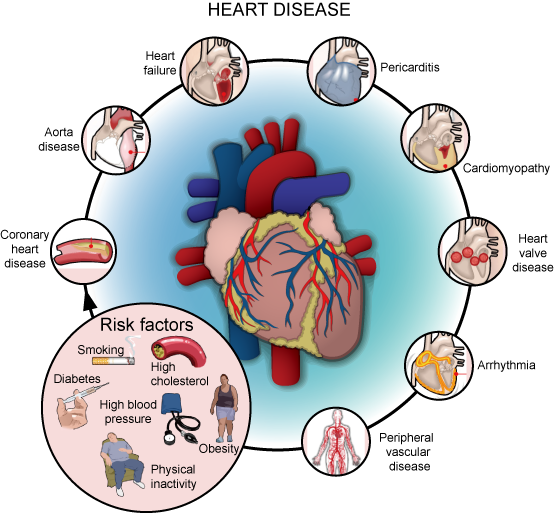

# Problem statement and Dataset

In this Project I am  going to explore the dataset in https://www.kaggle.com/sulianova/cardiovascular-disease-dataset .
The dataset maps the cardiac condition of several patients (70k). Also Iam going to predict if a given patient have a try a cardiovascular diseaseor not by using several algorithems such as logistic regression.



Features:

    Age | int (days)
    Height | int (cm) 
    Weight | float (kg) 
    Gender | categorical code | 1 - women, 2 - men
    Systolic blood pressure | ap_hi | int 
    Diastolic blood pressure |  ap_lo | int 
    Cholesterol | cholesterol | 1: normal, 2: above normal, 3: well above normal 
    Glucose | gluc | 1: normal, 2: above normal, 3: well above normal 
    Smoking | smoke | binary 
    Alcohol intake | alco | binary
    Physical activity | active | binary
Target :

    Presence or absence of cardiovascular disease | Target Variable | cardio | binary 


# Imports

In [1]:
#import needed libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,plot_roc_curve,plot_precision_recall_curve

# Read Data

In [2]:
#read file
df=pd.read_csv("cardio.csv",sep=";")

In [3]:
#show firt 5 rows from the dataset
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# EDA & Data Cleaning

In [4]:
#cheking number of observations
len(df)

70000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# null value in each columne
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
#df.drop_duplicates(inplace=True) #delete duplicates values.

Dataset contains 7000 observation , data type int and float- there is no null values or duplicate records. 

In [9]:
#show statistics about dataset 
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



-Age : The mean age is 53.3 years and the youngest patient is almost 30 years old


-Height :    The mean of the height is 164 cm


-Weight : The mean of the weight is 74.2 kg


-Blood pressure : contains some negative values which is in correct


-Smoke :The mean of smoke is 0.08, so few people in this dataset smokes


-Alcohol intake :The mean is 0.05, so few people in this dataset Alcohol intake


-Active :The mean of active is 0.8 so a lot of people do regular physical exercise.


-Cardio :The mean of cardio is 0.499 so nearly half of the people in the dataset have some cardiovascular disease. This also means this dataset is balanced so we dont need to convert to a balanced dataset to do our machine learning algoritm.


In [10]:
#drop id column
df=df.drop('id', axis='columns')

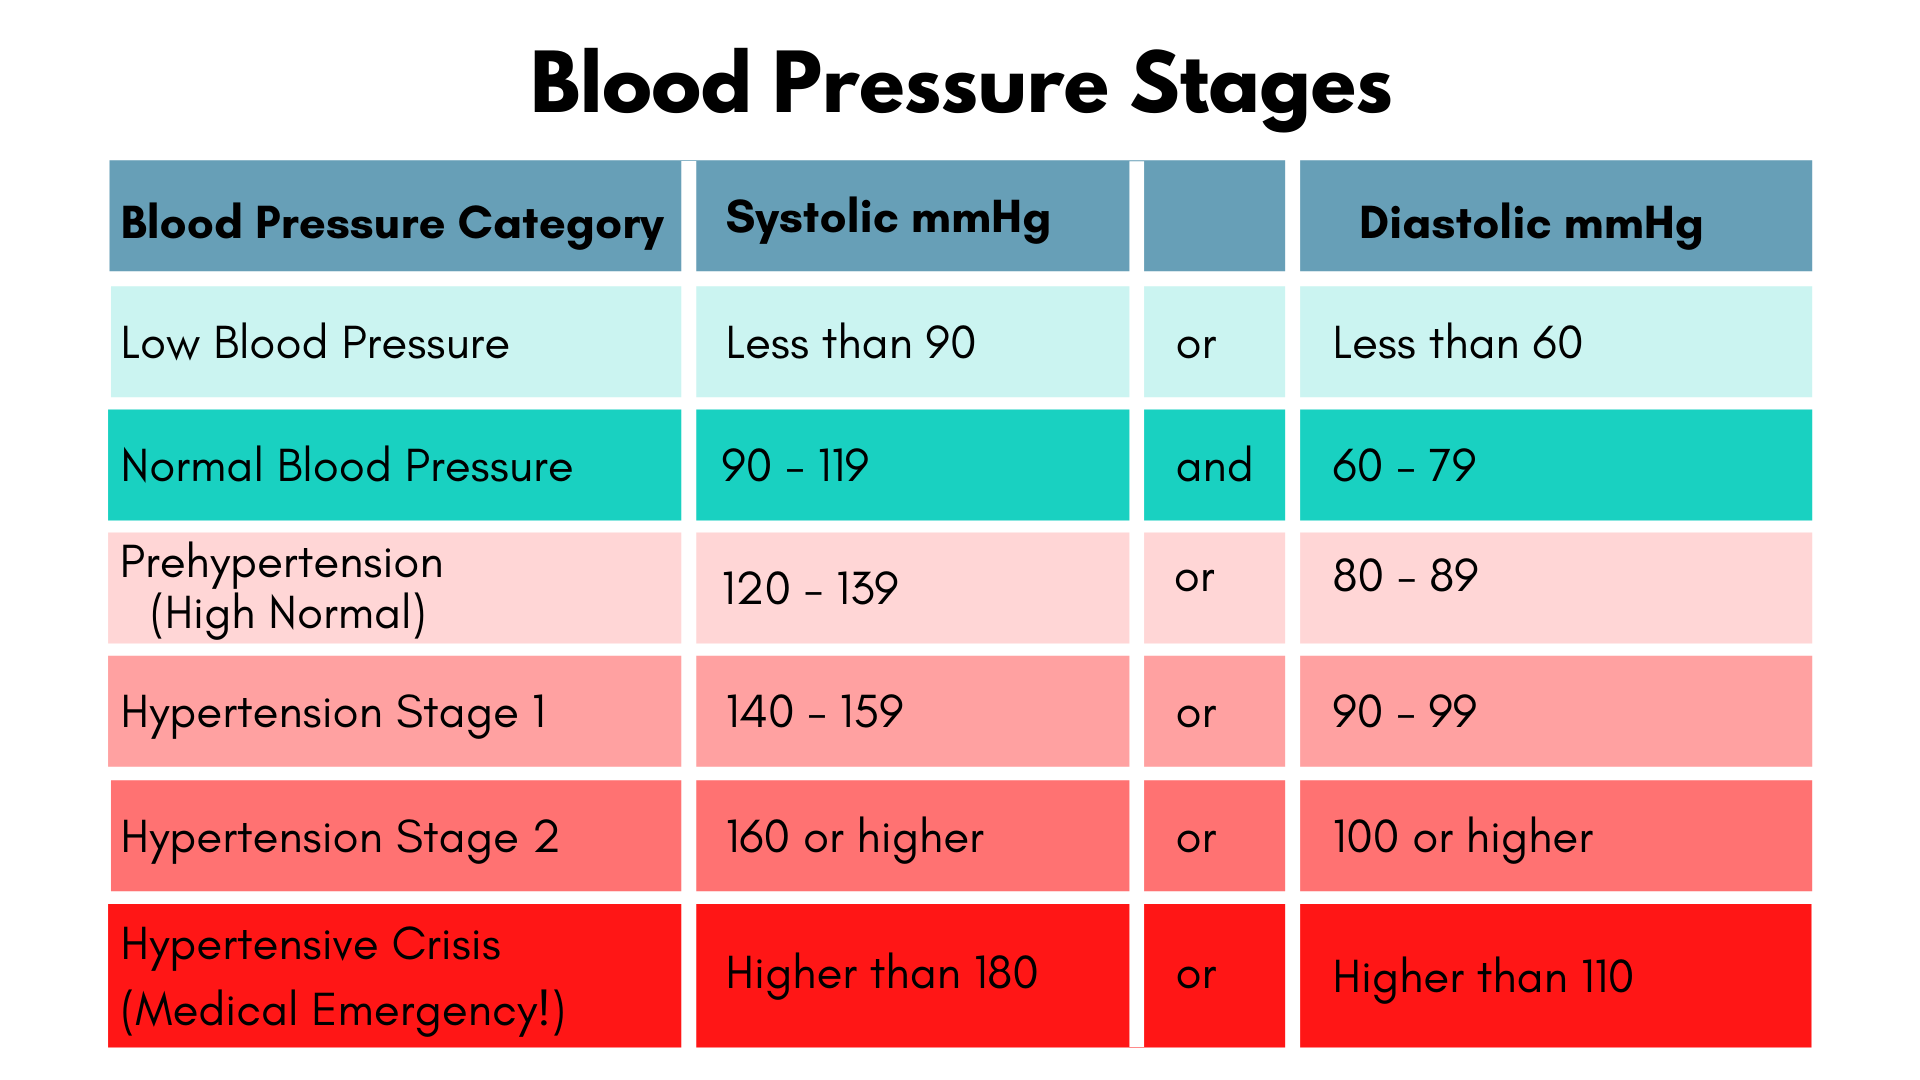

In [11]:
#drop rows with negative Systolic blood pressure
df.drop(df[df['ap_hi']<0].index, inplace = True)
df.drop(df[df['ap_lo']<0].index, inplace = True)

# Feature Engineering

In [12]:
#convert age to age y years instead of days
df['age'] = df['age']/365
df['age'].astype(int)

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 69992, dtype: int32

In [13]:
# convert columne wight type into int
df['weight']=df.weight.astype('int')

In [14]:
# converting hghit from cm to m then 
df['height']= df['height'] /100.0
df['height']

0        1.68
1        1.56
2        1.65
3        1.69
4        1.56
         ... 
69995    1.68
69996    1.58
69997    1.83
69998    1.63
69999    1.70
Name: height, Length: 69992, dtype: float64

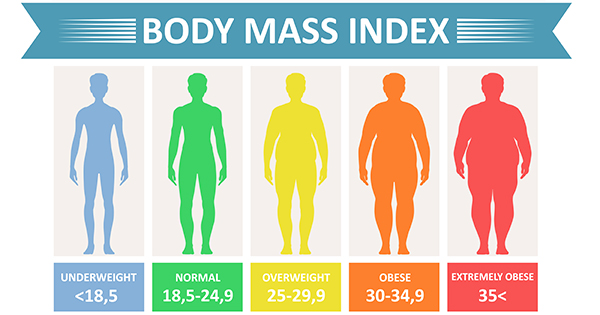

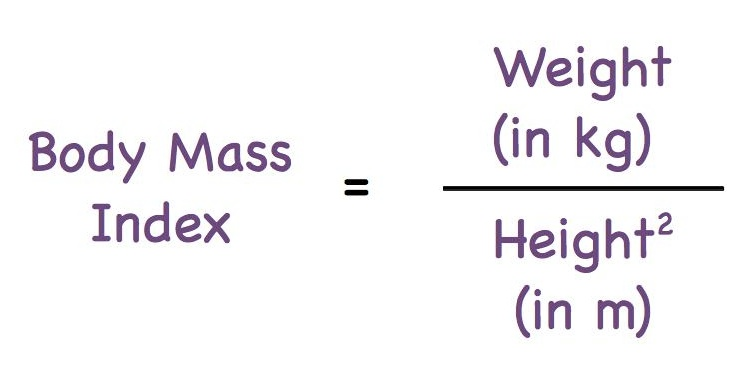

In [15]:
#calculate body BMI
df['BMI']=df['weight'] /(df['height']**2)

In [16]:
# convert columne BMI type into int
df['BMI']=df.BMI.astype('int')

In [17]:
#drop values of weight and hieght
df=df.drop(['height','weight'], axis='columns')

In [18]:
#check data after converting data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69992 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69992 non-null  float64
 1   gender       69992 non-null  int64  
 2   ap_hi        69992 non-null  int64  
 3   ap_lo        69992 non-null  int64  
 4   cholesterol  69992 non-null  int64  
 5   gluc         69992 non-null  int64  
 6   smoke        69992 non-null  int64  
 7   alco         69992 non-null  int64  
 8   active       69992 non-null  int64  
 9   cardio       69992 non-null  int64  
 10  BMI          69992 non-null  int32  
dtypes: float64(1), int32(1), int64(9)
memory usage: 6.1 MB


In [19]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,110,80,1,1,0,0,1,0,21
1,55.419178,1,140,90,3,1,0,0,1,1,34
2,51.663014,1,130,70,3,1,0,0,0,1,23
3,48.282192,2,150,100,1,1,0,0,1,1,28
4,47.873973,1,100,60,1,1,0,0,0,0,23


# Visualization



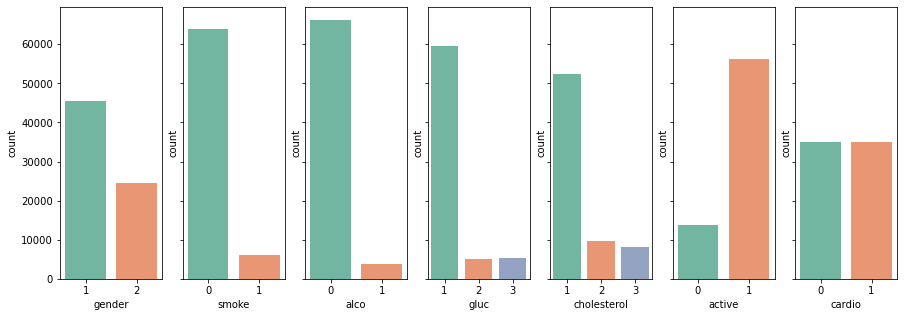

In [20]:
#Show the data distribution in the different categories:

f, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gender',data=df,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=df,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=df,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=df,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=df,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=df,ax=axes[5],palette="Set2")
sns.countplot(x='cardio',data=df,ax=axes[6],palette="Set2");

-Gender : Count of Female more than Male.

-Smoking : Number of non smoker more than smokers.

-Alcohol intake : Cont of non Alcoholic is more than alcohol intake.

-Glucose : Count of normal is more than above normal,well above normal.

-Cholesterol :  Count of people with normal is more than above normal and  well above normal.

-Physical activity : Number of active is more than non active.

-presence or absence of cardiovascular disease : about 50% have cardiovascular disease and 50% not.

Does Age affects disease?

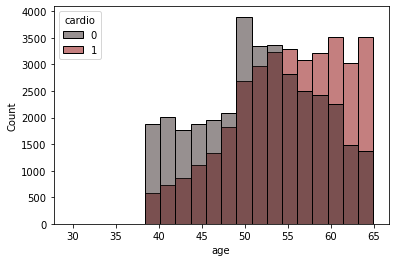

In [21]:
sns.histplot(data=df,x='age',bins=20,hue='cardio',palette="dark:darkred", alpha=0.5);

The data show that the ages of the sampled are between 30-65. It can also be clearly seen that age affects the disease.



Who's suffer from cardiovascular diseases more ?

In [22]:
df['cardio'].value_counts()

0    35017
1    34975
Name: cardio, dtype: int64

In [23]:
df.groupby("gender").sum()["cardio"]

gender
1    22614
2    12361
Name: cardio, dtype: int64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

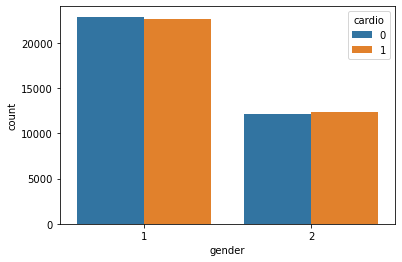

In [24]:
sns.countplot(df.gender, hue='cardio',data=df)


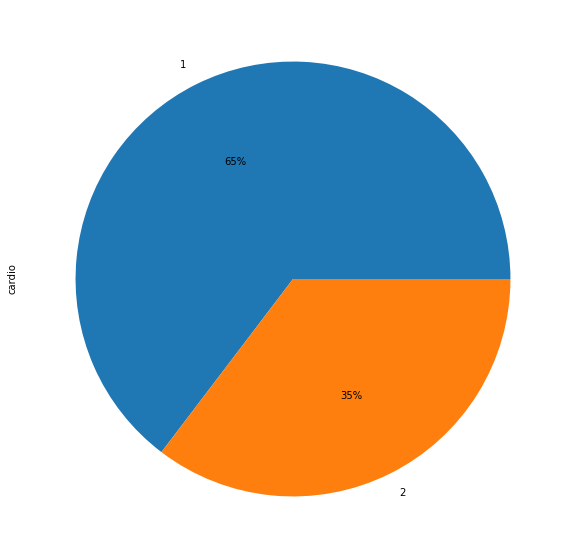

In [25]:
df.groupby("gender").sum()["cardio"].plot.pie(subplots=True, figsize=(20,10),autopct='%1.0f%%');

We can see clearlly that men suffer from cardiovascular diseases more than women

<AxesSubplot:>

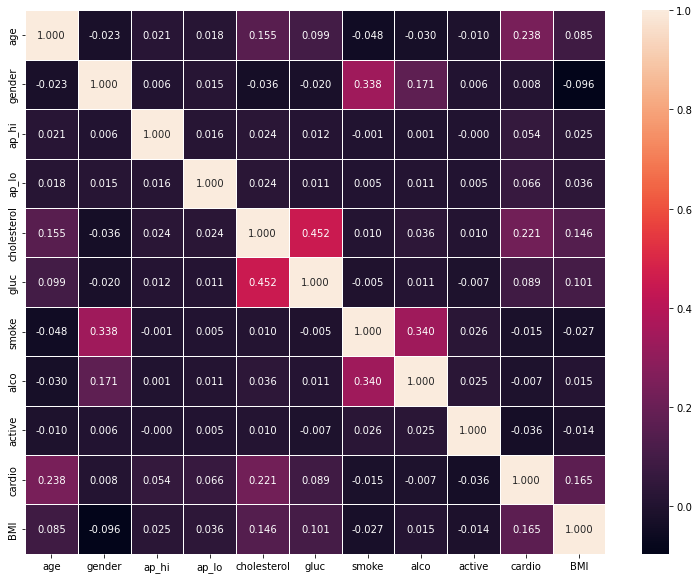

In [26]:
corr = df.corr()
f, ax = plt.subplots(figsize = (13,10))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)


It can be seen that the factors that mainly affect the 'cardio' feature are: blood pressure, cholesterol, age ,BMI .

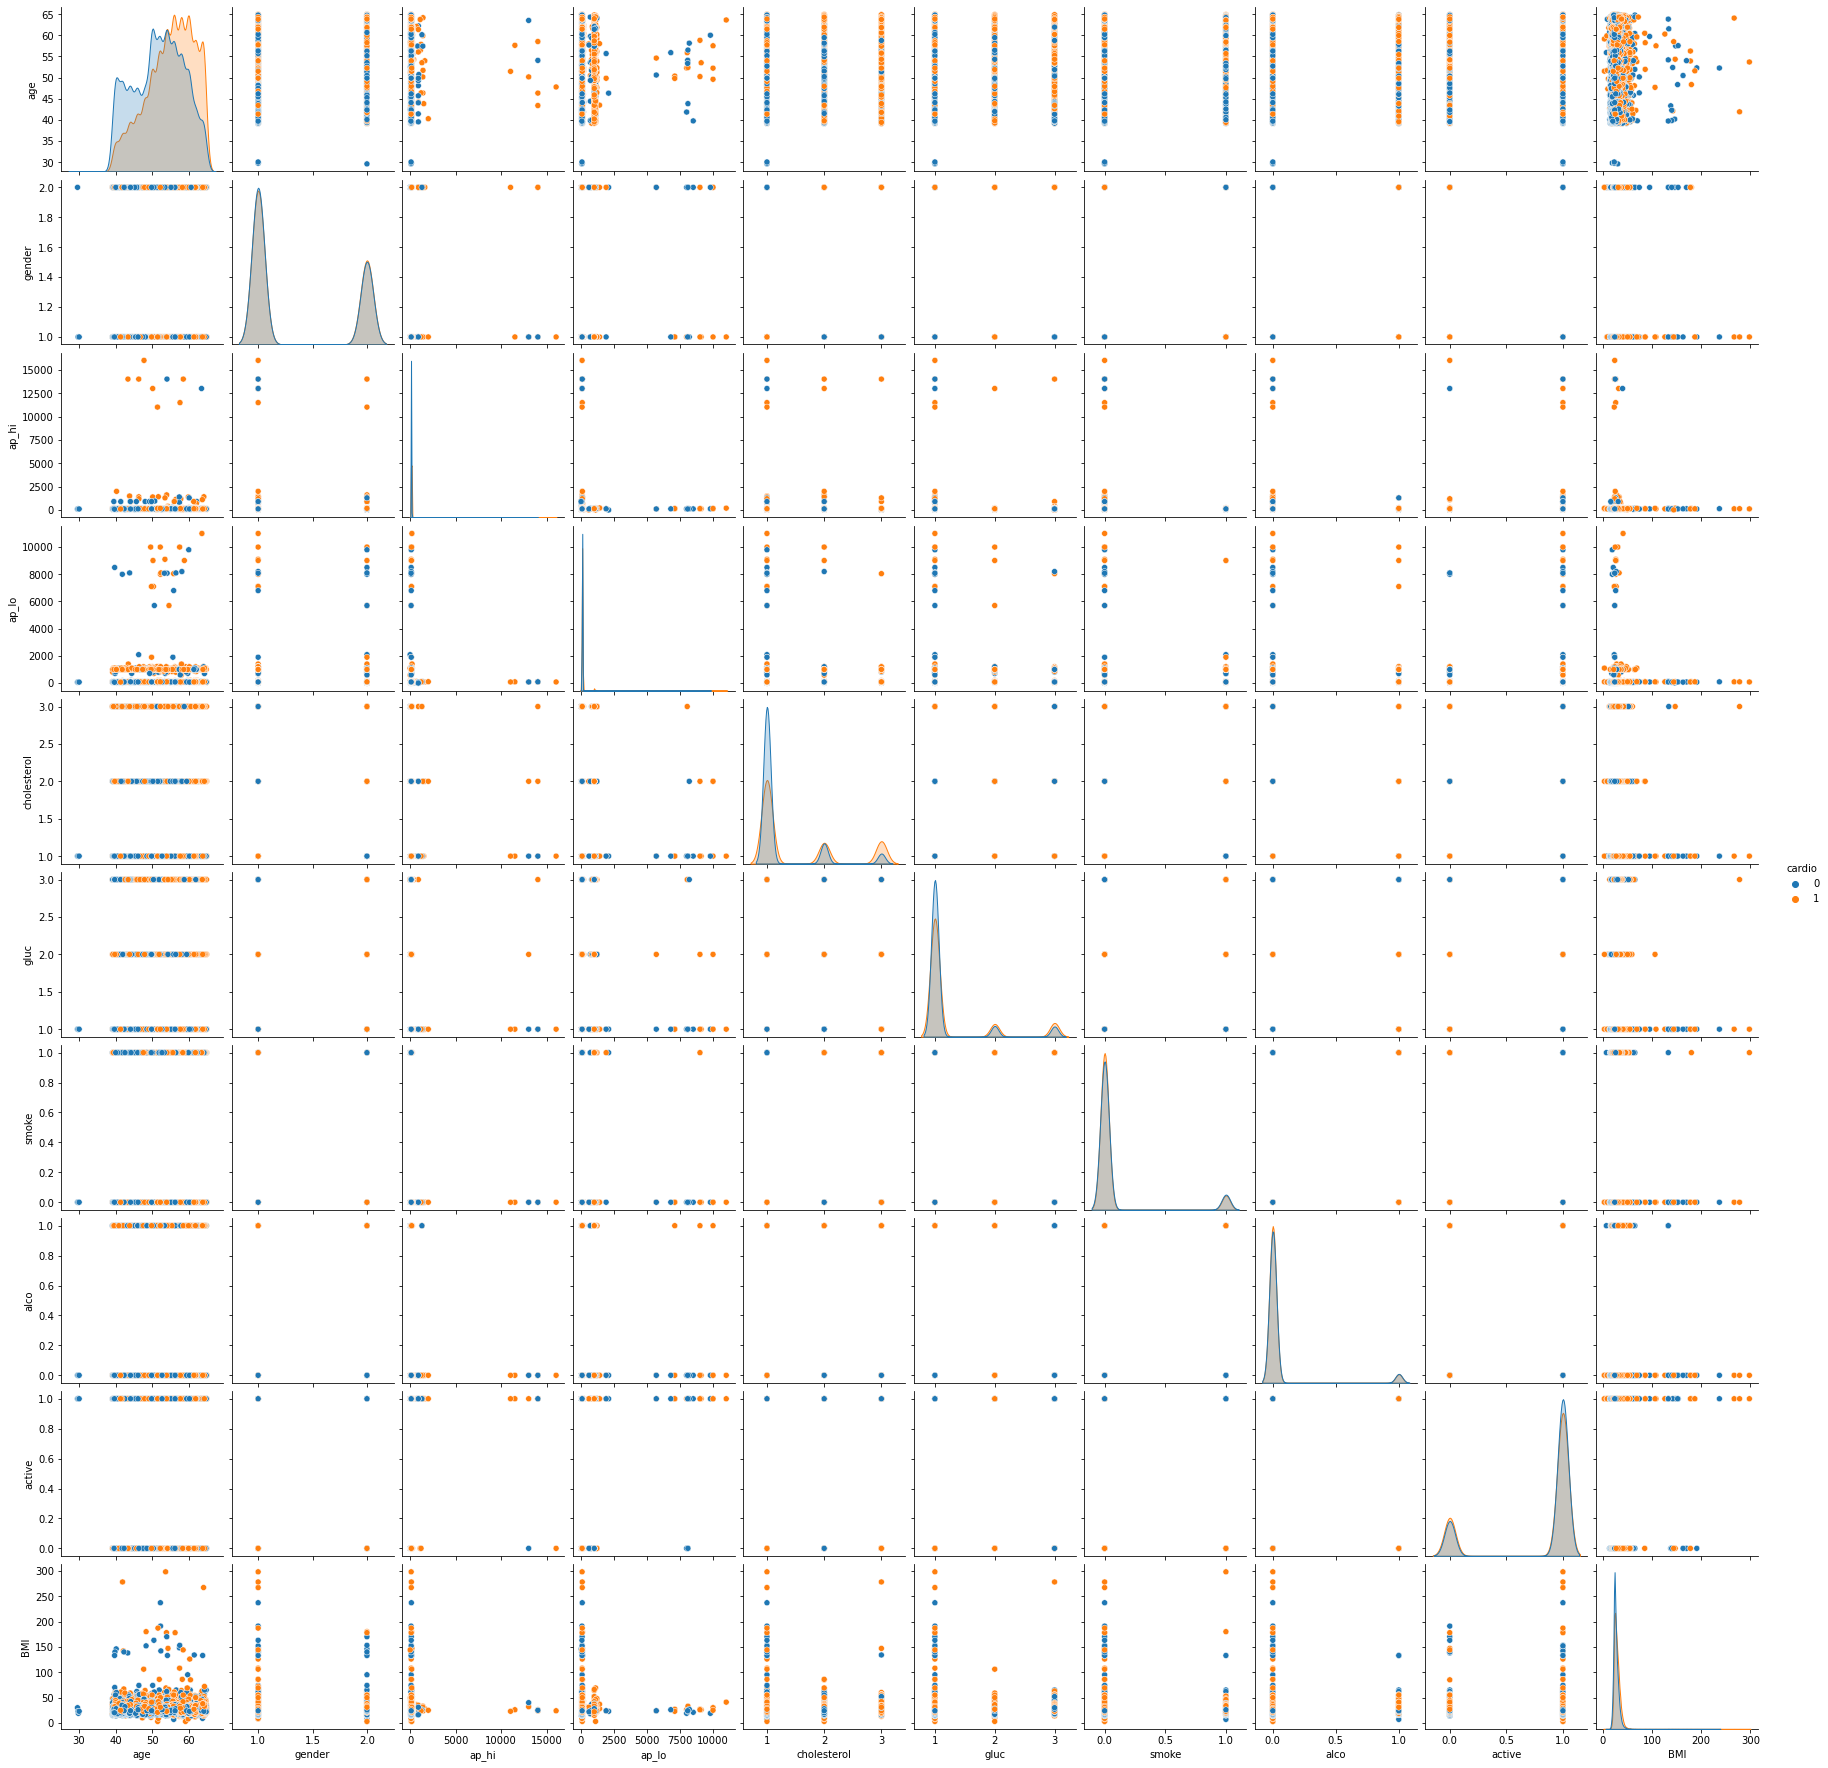

In [46]:
sns.pairplot(df, hue='cardio');

# Modeling

# 1.  Logistic Regression

In [48]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [49]:
#split data to test and train 
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1), df['cardio'], 
                                                    test_size = 0.2, random_state=42)

In [50]:
#run logistic regression model 
lr =  LogisticRegression()
lr.fit(X_train, y_train)
lr_pre=lr.predict(X_test)
lr.score(X_test,y_test)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7130509322094435

In [52]:
print(classification_report(y_test,lr_pre,target_names=['not_Cardic', 'Cardic']))

              precision    recall  f1-score   support

  not_Cardic       0.69      0.75      0.72      6899
      Cardic       0.73      0.68      0.71      7100

    accuracy                           0.71     13999
   macro avg       0.71      0.71      0.71     13999
weighted avg       0.71      0.71      0.71     13999



In [53]:
#Standardize the data to allow the model to better study the data.

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)

lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)

y_predict = lr2.predict(X_train_scaled) 
lr2.score(X_train_scaled, y_train)

0.7208758237636848

# 2. Random Forest

In [54]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pre=rf.predict(X_test)
rf.score(X_test,y_test)

0.6824773198085577

In [55]:
print(classification_report(y_test,rf_pre,target_names=['not_Cardic', 'Cardic']))

              precision    recall  f1-score   support

  not_Cardic       0.68      0.67      0.67      6899
      Cardic       0.68      0.70      0.69      7100

    accuracy                           0.68     13999
   macro avg       0.68      0.68      0.68     13999
weighted avg       0.68      0.68      0.68     13999



# Comparing Models

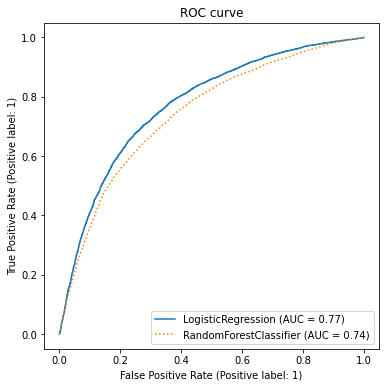

In [58]:
fig, (ax1) = plt.subplots(1, figsize=(6, 6),sharex=True)

plot_roc_curve(lr, X_test, y_test,ax=ax1)
plot_roc_curve(rf, X_test, y_test,ax=ax1,linestyle=':')


ax1.set_title('ROC curve')
plt.show()

We can see that the area under curve for logistic regression is better than randomforest classifier .